In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
data=pd.read_csv('Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
"""
CRIM per capita crime rate by town 
ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
INDUS proportion of non-retail business acres per town 
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
NOX nitric oxides concentration (parts per 10 million) 
RM average number of rooms per dwelling 
AGE proportion of owner-occupied units built prior to 1940 
DIS weighted distances to five Boston employment centres 
RAD index of accessibility to radial highways 
TAX full-value property-tax rate per 10,000usd 
PTRATIO pupil-teacher ratio by town 
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
LSTAT % lower status of the population 
"""

'\nCRIM per capita crime rate by town \nZN proportion of residential land zoned for lots over 25,000 sq.ft. \nINDUS proportion of non-retail business acres per town \nCHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) \nNOX nitric oxides concentration (parts per 10 million) \nRM average number of rooms per dwelling \nAGE proportion of owner-occupied units built prior to 1940 \nDIS weighted distances to five Boston employment centres \nRAD index of accessibility to radial highways \nTAX full-value property-tax rate per 10,000usd \nPTRATIO pupil-teacher ratio by town \nB 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town \nLSTAT % lower status of the population \n'

In [7]:
# Spliting target variable and independent variables
X = data.drop(['medv'], axis = 1)
y = data['medv']

In [8]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [9]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [10]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [11]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [14]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.24686205023778607
Adjusted R^2: 0.21575900806471526
MAE: 4.914480433986104
MSE: 56.68931832900113
RMSE: 7.5292309254665


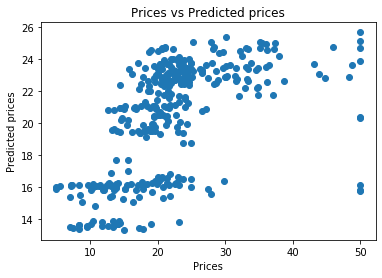

In [15]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [16]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [17]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.14926595412439558
Adjusted R^2: 0.06232962826849453
MAE: 6.1005185023264925
MSE: 88.83371056296637
RMSE: 9.425163688921607


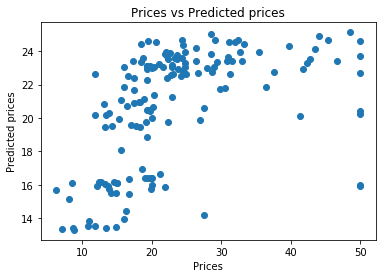

In [18]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [19]:
# now using different parameters
#using SVC kernel (linear)
#since we are using SVC classifier, we need to have categorical data.
# converting our target column, ie medv into categorical data 
bins=[0,15,30,45,60]
labels=['cheapest','low','medium','high']

In [20]:

data['HousingCostBin'] = pd.cut(data['medv'], bins,labels=labels)

In [21]:
#dropping medv column since it returns sa,e value as housingcostBin 
data.drop(columns=['medv'])

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,HousingCostBin
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,low
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,low
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,medium
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,medium
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,low
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,low
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,low
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,low


In [22]:
# Spliting target variable and independent variables
X = data.drop(['HousingCostBin'], axis = 1)
y = data['HousingCostBin']

In [24]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [25]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9342105263157895


In [29]:

#############################################
#using polynomial kernel



from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [30]:
y_pred = svclassifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0  7  0]
 [ 0  2  8  0]
 [ 2  0 91  0]
 [ 0  0 21  0]]
              precision    recall  f1-score   support

    cheapest       0.91      0.75      0.82        28
        high       1.00      0.20      0.33        10
         low       0.72      0.98      0.83        93
      medium       0.00      0.00      0.00        21

    accuracy                           0.75       152
   macro avg       0.66      0.48      0.50       152
weighted avg       0.67      0.75      0.68       152



/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#########################
#gaussian kernel


from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [33]:
y_pred = svclassifier.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0 20  0]
 [ 0  0 10  0]
 [ 3  0 90  0]
 [ 0  0 21  0]]
              precision    recall  f1-score   support

    cheapest       0.73      0.29      0.41        28
        high       0.00      0.00      0.00        10
         low       0.64      0.97      0.77        93
      medium       0.00      0.00      0.00        21

    accuracy                           0.64       152
   macro avg       0.34      0.31      0.29       152
weighted avg       0.52      0.64      0.55       152



/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#function to perform svm with different gamma values
def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

In [36]:
#using default values of gamma and C functions

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.7352941176470589
              precision    recall  f1-score   support

    cheapest       0.67      0.33      0.44        18
        high       0.00      0.00      0.00         5
         low       0.74      0.96      0.84        72
      medium       0.00      0.00      0.00         7

    accuracy                           0.74       102
   macro avg       0.35      0.32      0.32       102
weighted avg       0.64      0.74      0.67       102

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6732673267326733
              precision    recall  f1-score   support

    cheapest       0.85      0.29      0.43        79
        high       0.00      0.00      0.00        17
         low       0.66      0.98      0.79       253
      medium       0.00      0.00      0.00        55

    accuracy                           0.67       404
   macro avg       0.38      0.32 

/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jee

In [37]:
#using gamma as 0.1 and c as 1
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 0.1)

----- Evaluation on Test Data -----
Accuracy Score:  0.7058823529411765
              precision    recall  f1-score   support

    cheapest       0.00      0.00      0.00        18
        high       0.00      0.00      0.00         5
         low       0.71      1.00      0.83        72
      medium       0.00      0.00      0.00         7

    accuracy                           0.71       102
   macro avg       0.18      0.25      0.21       102
weighted avg       0.50      0.71      0.58       102

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9975247524752475
              precision    recall  f1-score   support

    cheapest       1.00      0.99      0.99        79
        high       1.00      1.00      1.00        17
         low       1.00      1.00      1.00       253
      medium       1.00      1.00      1.00        55

    accuracy                           1.00       404
   macro avg       1.00      1.00 

/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#gamma=0.000001 and c =1
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 0.000001)

----- Evaluation on Test Data -----
Accuracy Score:  0.7156862745098039
              precision    recall  f1-score   support

    cheapest       0.55      0.33      0.41        18
        high       0.00      0.00      0.00         5
         low       0.74      0.93      0.82        72
      medium       0.00      0.00      0.00         7

    accuracy                           0.72       102
   macro avg       0.32      0.32      0.31       102
weighted avg       0.62      0.72      0.65       102

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6732673267326733
              precision    recall  f1-score   support

    cheapest       0.83      0.30      0.44        79
        high       0.00      0.00      0.00        17
         low       0.66      0.98      0.79       253
      medium       0.00      0.00      0.00        55

    accuracy                           0.67       404
   macro avg       0.37      0.32 

/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jee

In [39]:
#c=0.5 gamma=0.000001
X_train, X_test, y_train, y_test, clf = fitting(X, y, 0.5, 0.000001)

----- Evaluation on Test Data -----
Accuracy Score:  0.7156862745098039
              precision    recall  f1-score   support

    cheapest       0.55      0.33      0.41        18
        high       0.00      0.00      0.00         5
         low       0.74      0.93      0.82        72
      medium       0.00      0.00      0.00         7

    accuracy                           0.72       102
   macro avg       0.32      0.32      0.31       102
weighted avg       0.62      0.72      0.65       102

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6732673267326733
              precision    recall  f1-score   support

    cheapest       0.83      0.30      0.44        79
        high       0.00      0.00      0.00        17
         low       0.66      0.98      0.79       253
      medium       0.00      0.00      0.00        55

    accuracy                           0.67       404
   macro avg       0.37      0.32 

/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeetshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jee